# Analysis of Soccer Player Data

We analyze real (but small amount of) soccer data which contains information about players and their statistics. This is a great way to practise data visualization and data analysis skills without drowning into the complications of a huge dataset. 

In the end we try to predict the amount of goals the players score using a simple linear regression model. We also try to interpret the linear coefficients of the model and deduce what features of the players affect the most to the goal score.

## Statistics 



Let's load the csv file into a dataframe and print all the rows.


In [43]:
import pandas as pd

df = pd.read_csv("data/players.csv")
print("Number of columns: ", len(df.columns))
print("Number of rows: ", len(df))

df

Number of columns:  11
Number of rows:  34


,Player Name,Age,Height,Weight,Position,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
0,Lionel Messi,34,170,72,Forward,30,15,87.5,60,20,10
1,Cristiano Ronaldo,36,187,83,Forward,25,10,82.3,55,15,5
2,Neymar Jr,29,175,68,Forward,20,20,88.2,50,18,12
3,Kylian Mbappe,22,178,73,Forward,29,12,85.6,52,22,10
4,Mohamed Salah,29,175,71,Forward,23,9,82.3,45,18,8
5,Luka Modric,35,172,66,Midfielder,5,10,88.1,22,30,25
6,Andrew Robertson,27,178,64,Defender,2,6,87.9,5,41,30
7,Neymar Jr.,29,175,68,Forward,19,15,81.4,38,12,9
8,Thiago Alcantara,30,174,70,Midfielder,3,7,91.2,14,25,18
9,Sergio Ramos,35,184,82,Defender,6,2,89.5,12,40,32


In principle we could check the amount of null values from this small data by hand. But let's use the dataframe method isnull for this. We see that there are no null values present, i.e. the data is clean in this sense.


In [44]:
print("The amount of missing values or NaN values for each column: \n ")
print(df.isnull().sum().to_string())

The amount of missing values or NaN values for each column: 
 
Player Name        0
Age                0
Height             0
Weight             0
Position           0
Goals              0
Assists            0
Pass Accuracy      0
Shots on Target    0
Tackles            0
Interceptions      0


Let's also check whether the data contains duplicate rows. This is difficult to see manually even from a small dataset. We see that there are no duplicate rows.


In [45]:
duplicates = df.duplicated().sum()
print(f"Amount of duplicate rows: {duplicates}")

Amount of duplicate rows: 0


We print the basic information of the data such as data types and column names. We see from the data types that the data is clean also in this sense, i.e. all the numeric features are already either of integer type or of float type. Only name and position are of object type.


In [46]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player Name      34 non-null     object 
 1   Age              34 non-null     int64  
 2   Height           34 non-null     int64  
 3   Weight           34 non-null     int64  
 4   Position         34 non-null     object 
 5   Goals            34 non-null     int64  
 6   Assists          34 non-null     int64  
 7   Pass Accuracy    34 non-null     float64
 8   Shots on Target  34 non-null     int64  
 9   Tackles          34 non-null     int64  
 10  Interceptions    34 non-null     int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 3.1+ KB


Let's print the amount of unique values of the columns. From here we can see for example the amount positions in the game.


In [47]:
print("The amount of unique values of columns: \n")
df.nunique()

The amount of unique values of columns: 



Player Name        34
Age                13
Height             20
Weight             23
Position            4
Goals              15
Assists            16
Pass Accuracy      28
Shots on Target    22
Tackles            18
Interceptions      17
dtype: int64

Since the data is clean we can print all the basic statistics of the numerical features in the data without fear of distortion.


In [48]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Age,Height,Weight,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
count,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
mean,29.5,182.9,78.3,8.1,5.9,83.8,19.4,16.6,11.0
std,3.8,6.9,8.1,9.7,5.8,6.1,19.4,11.4,8.5
min,22.0,170.0,64.0,0.0,0.0,68.0,0.0,0.0,0.0
25%,27.0,178.0,71.2,1.0,0.2,82.0,2.8,10.0,5.0
50%,29.5,183.5,78.0,3.5,4.5,85.0,13.0,16.5,10.0
75%,32.5,188.0,84.8,13.8,10.0,88.1,33.8,21.5,15.0
max,36.0,196.0,92.0,30.0,20.0,91.8,60.0,41.0,32.0


## Visualization 

Next we draw some illustrative graphs from the data. First we plot the distributions of the numerical features and position using histograms, bar charts and pie charts. From the distributions of the numerical features we can see if they resemble the normal distribution and how to look for outliers from the data.


Largest value:  36
Lowest value:  22
Median value:  30
Average value:  30
Standard deviation:  4


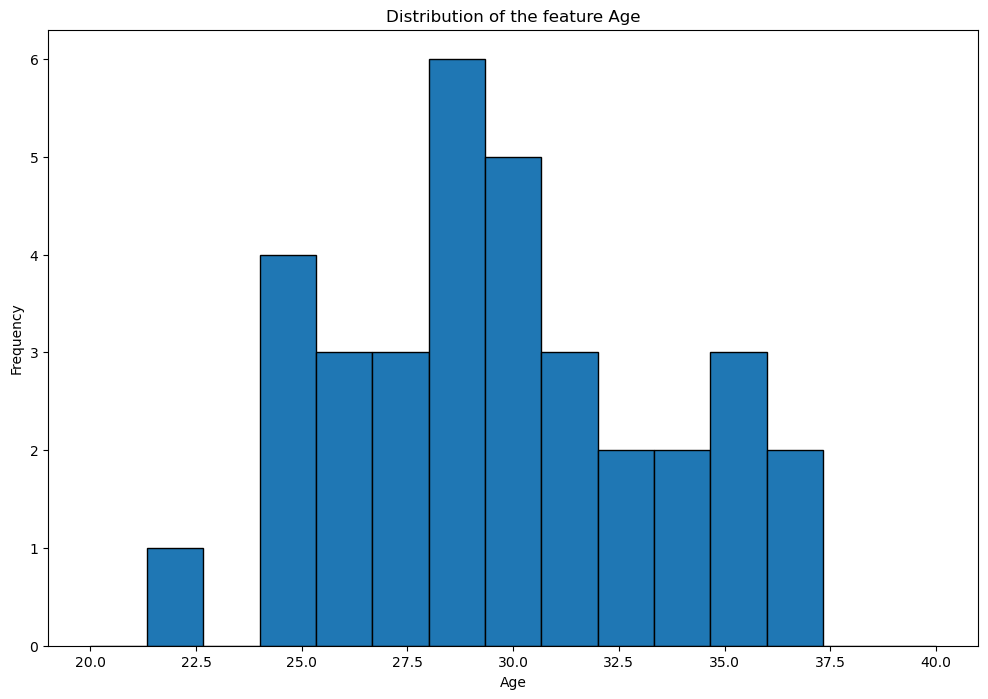

In [49]:
import matplotlib.pyplot as plt

df["Age"].plot(kind = "hist", bins = 15, range= [20, 40], figsize = (12, 8), edgecolor = "black")
plt.xlabel("Age")
plt.title("Distribution of the feature Age")
print("Largest value: ", df["Age"].max())
print("Lowest value: ", df["Age"].min())
print("Median value: ", round(df["Age"].median()))
print("Average value: ", round(df["Age"].mean()))
print("Standard deviation: ", round(df["Age"].std()))

Largest value:  196
Lowest value:  170
Median value:  184
Average value:  183
Standard deviation:  7


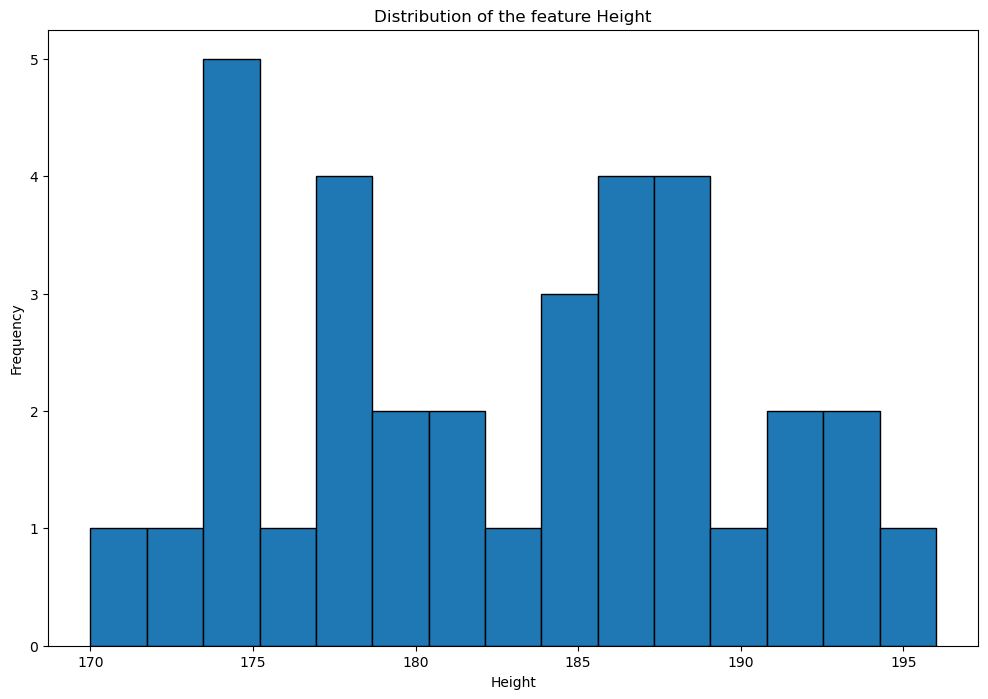

In [50]:
df["Height"].plot(kind = "hist", bins = 15, range= [170, 196], figsize = (12, 8), edgecolor = "black")
plt.xlabel("Height")
plt.title("Distribution of the feature Height")
print("Largest value: ", df["Height"].max())
print("Lowest value: ", df["Height"].min())
print("Median value: ", round(df["Height"].median()))
print("Average value: ", round(df["Height"].mean()))
print("Standard deviation: ", round(df["Height"].std()))

Largest value:  92
Lowest value:  64
Median value:  78
Average value:  78
Standard deviation:  8


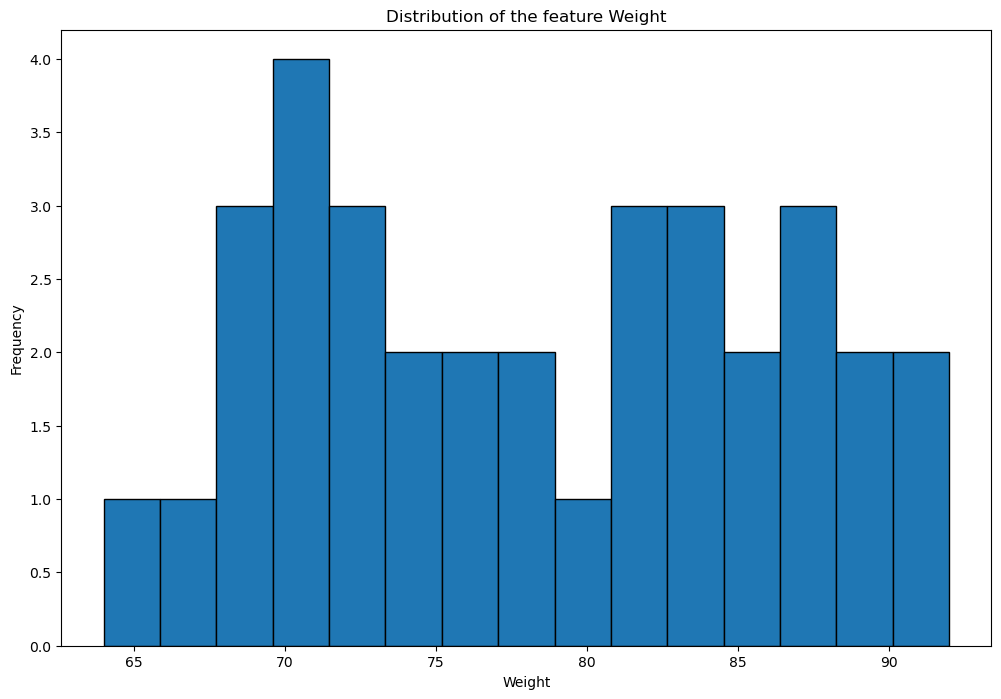

In [51]:
df["Weight"].plot(kind = "hist", bins = 15, range= [64, 92], figsize = (12, 8), edgecolor = "black")
plt.xlabel("Weight")
plt.title("Distribution of the feature Weight")
print("Largest value: ", df["Weight"].max())
print("Lowest value: ", df["Weight"].min())
print("Median value: ", round(df["Weight"].median()))
print("Average value: ", round(df["Weight"].mean()))
print("Standard deviation: ", round(df["Weight"].std()))

Largest value:  30
Lowest value:  0
Median value:  4
Most common value:  0


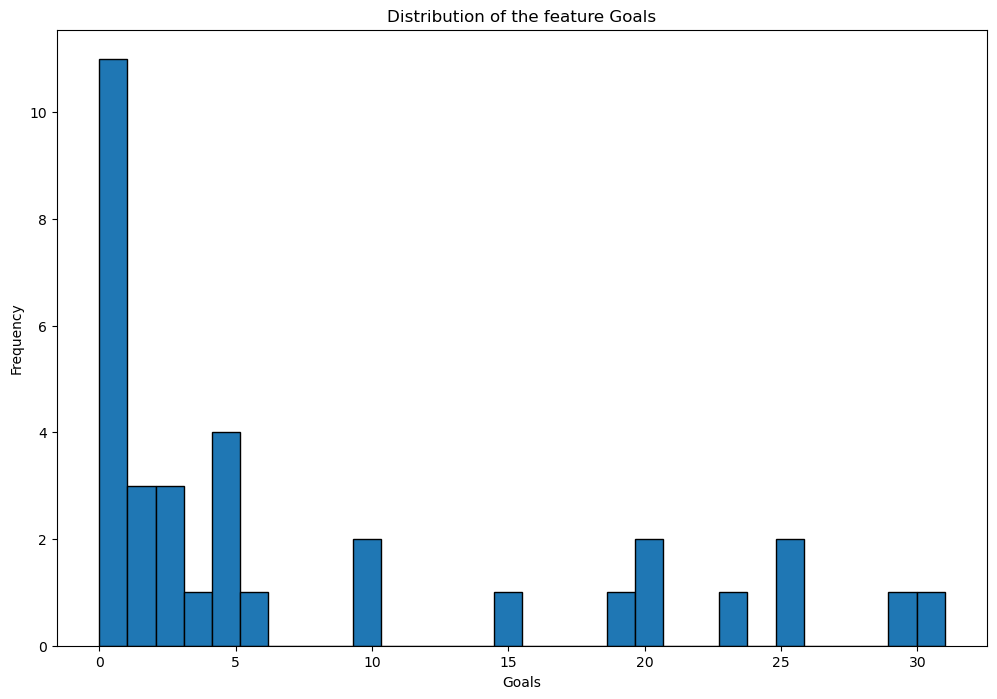

In [52]:
df["Goals"].plot(kind = "hist", bins = 30, range= [0, 31], figsize = (12, 8), edgecolor = "black")
plt.xlabel("Goals")
plt.title("Distribution of the feature Goals")
print("Largest value: ", df["Goals"].max())
print("Lowest value: ", df["Goals"].min())
print("Median value: ", round(df["Goals"].median()))
print("Most common value: ", df["Goals"].mode().values[0])

Largest value:  20
Lowest value:  0
Median value:  4
Most common value:  0


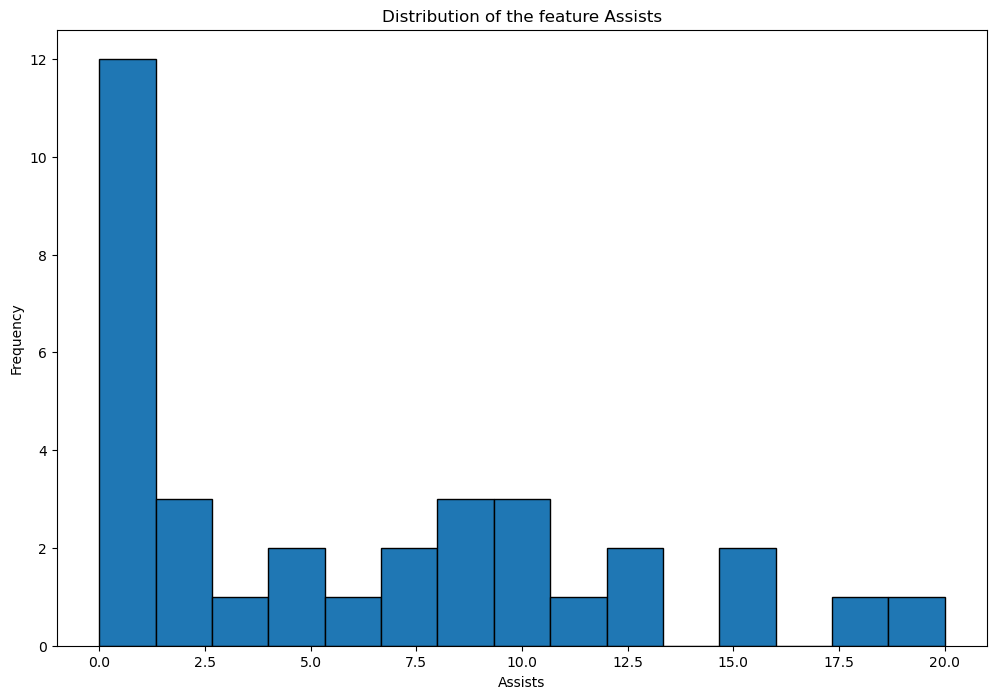

In [53]:
df["Assists"].plot(kind = "hist", bins = 15, range= [0, 20], figsize = (12, 8), edgecolor = "black")
plt.xlabel("Assists")
plt.title("Distribution of the feature Assists")
print("Largest value: ", df["Assists"].max())
print("Lowest value: ", df["Assists"].min())
print("Median value: ", round(df["Assists"].median()))
print("Most common value: ", df["Assists"].mode().values[0])

Largest value:  91.8
Lowest value:  68.0
Average value:  84
Median value:  85
Standard deviation:  6


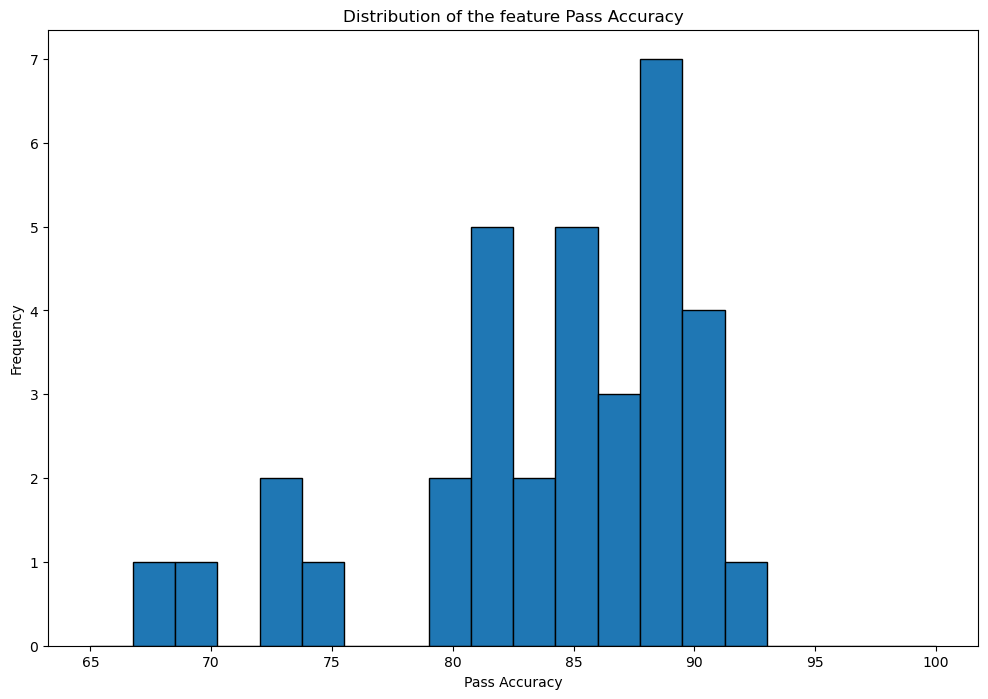

In [54]:
df["Pass Accuracy"].plot(kind = "hist", bins = 20, range= [65, 100], figsize = (12, 8), edgecolor = "black")
plt.xlabel("Pass Accuracy")
plt.title("Distribution of the feature Pass Accuracy")
print("Largest value: ", df["Pass Accuracy"].max())
print("Lowest value: ", df["Pass Accuracy"].min())
print("Average value: ", round(df["Pass Accuracy"].mean()))
print("Median value: ", round(df["Pass Accuracy"].median()))
print("Standard deviation: ", round(df["Pass Accuracy"].std()))

Largest value:  60
Lowest value:  0
Median value:  13
Most common value:  0


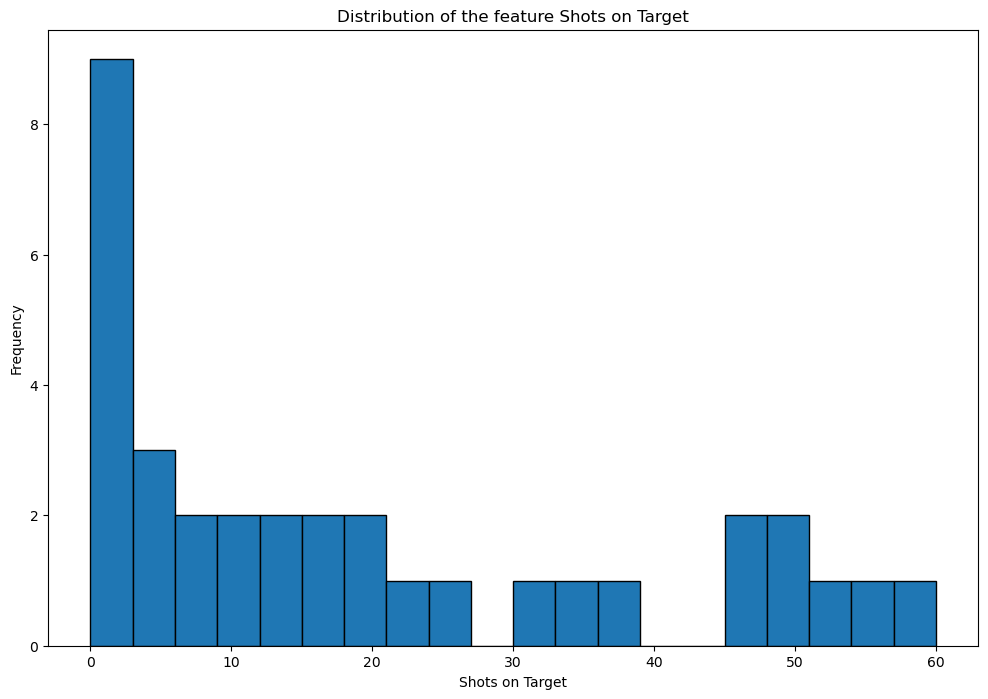

In [55]:
df["Shots on Target"].plot(kind = "hist", bins = 20, range= [0, 60], figsize = (12, 8), edgecolor = "black")
plt.xlabel("Shots on Target")
plt.title("Distribution of the feature Shots on Target")
print("Largest value: ", df["Shots on Target"].max())
print("Lowest value: ", df["Shots on Target"].min())
print("Median value: ", round(df["Shots on Target"].median()))
print("Most common value: ", df["Shots on Target"].mode().values[0])

Largest value:  41
Lowest value:  0
Average value:  17
Median value:  16
Standard deviation:  11
Most common value:  0


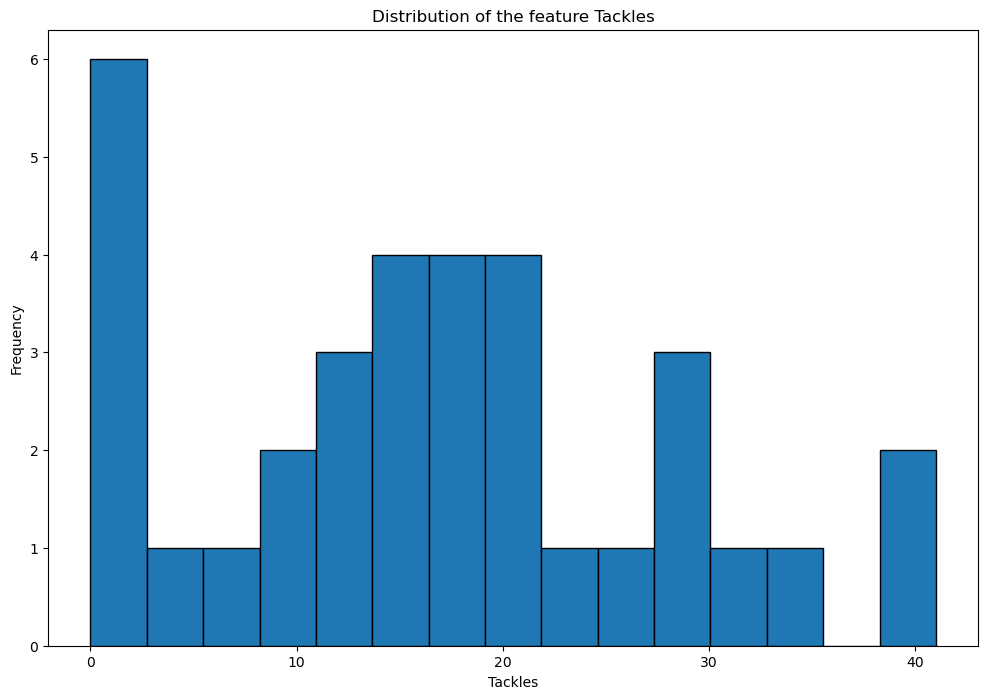

In [56]:
df["Tackles"].plot(kind = "hist", bins = 15, range= [0, 41], figsize = (12, 8), edgecolor = "black")
plt.xlabel("Tackles")
plt.title("Distribution of the feature Tackles")
print("Largest value: ", df["Tackles"].max())
print("Lowest value: ", df["Tackles"].min())
print("Average value: ", round(df["Tackles"].mean()))
print("Median value: ", round(df["Tackles"].median()))
print("Standard deviation: ", round(df["Tackles"].std()))
print("Most common value: ", df["Tackles"].mode().values[0])

Largest value:  32
Lowest value:  0
Average value:  11
Median value:  10
Standard deviation:  9
Most common value:  0


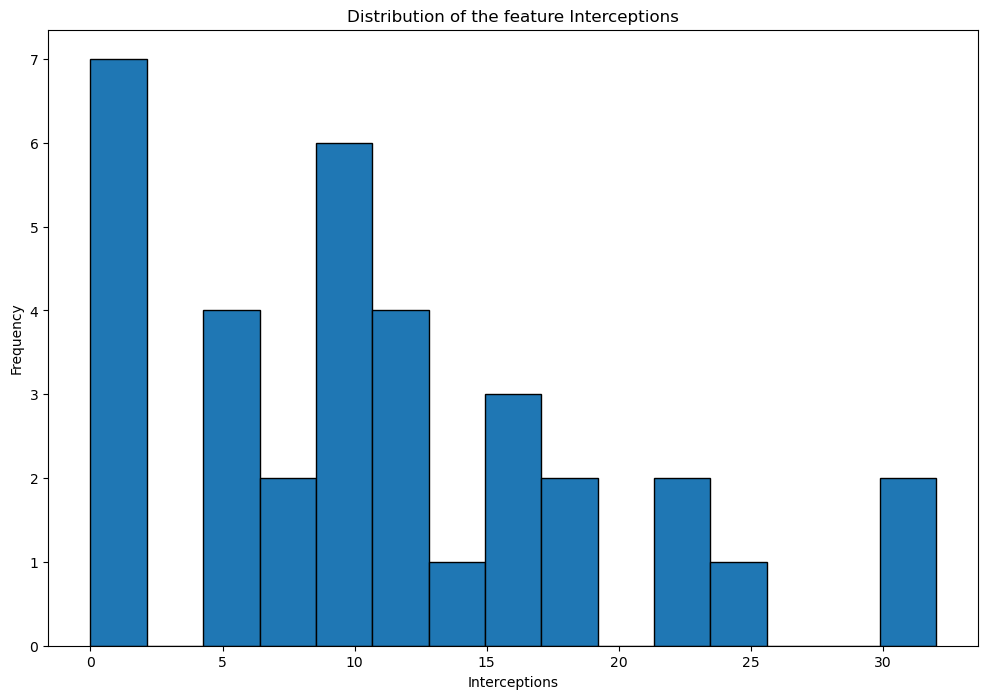

In [57]:
df["Interceptions"].plot(kind = "hist", bins = 15, range= [0, 32], figsize = (12, 8), edgecolor = "black")
plt.xlabel("Interceptions")
plt.title("Distribution of the feature Interceptions")
print("Largest value: ", df["Interceptions"].max())
print("Lowest value: ", df["Interceptions"].min())
print("Average value: ", round(df["Interceptions"].mean()))
print("Median value: ", round(df["Interceptions"].median()))
print("Standard deviation: ", round(df["Interceptions"].std()))
print("Most common value: ", df["Interceptions"].mode().values[0])

Most common position: Forward with 10 counts


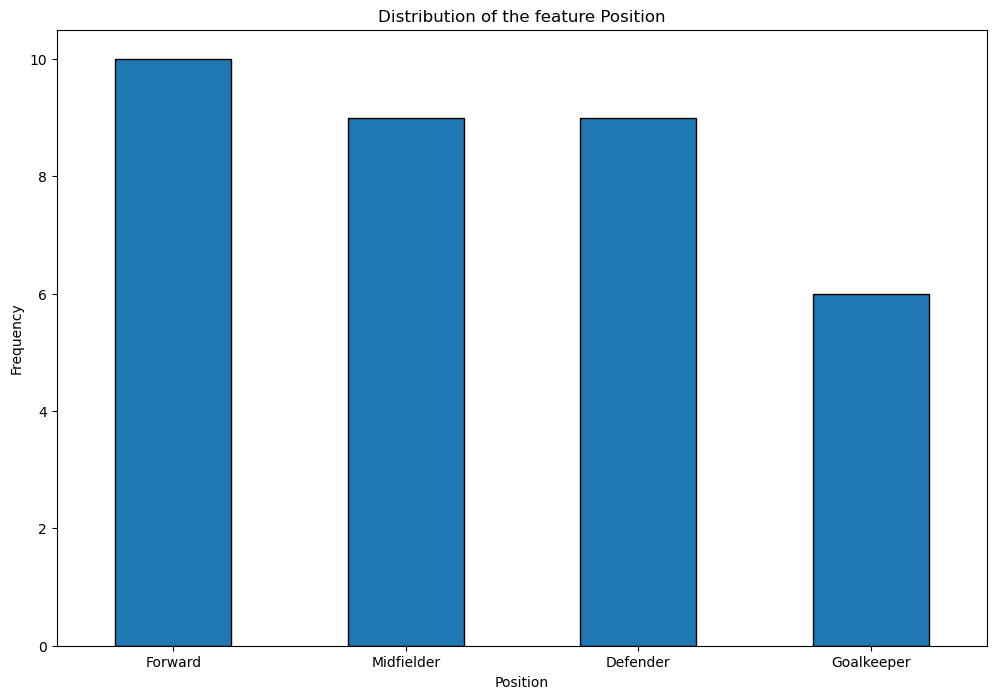

In [58]:
ax1 = df["Position"].value_counts().plot(kind='bar', figsize = (12, 8), edgecolor = "black")
ax1.tick_params(axis='x', rotation=0)
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.title("Distribution of the feature Position")
mode1 = df["Position"].mode().values[0]
counts1 = len(df[df["Position"] == df["Position"].mode().values[0]])
print(f"Most common position: {mode1} with {counts1} counts")

Text(0.5, 1.0, 'Distribution of the feature Position')

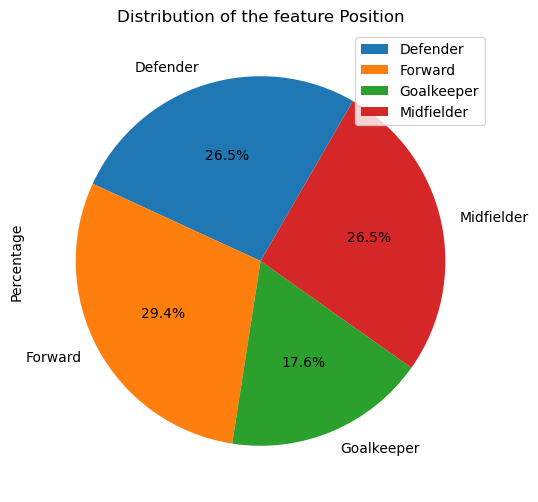

In [59]:
dataframe1 = pd.DataFrame(df.groupby("Position").size())
dataframe1.rename(columns = {0: "Percentage"}, inplace = True)
dataframe1.plot(kind = "pie", y = "Percentage", labels = dataframe1.index, autopct='%1.1f%%', title="Distribution of position",
              figsize = (10, 6), startangle=60)
plt.title("Distribution of the feature Position")

Then we draw a couple of scatter plots. From the scatter plots we can see approximately if a pair of features correlate with each other. We notice that height and weight correlate as they should, but age and weight do not correlate. This is of course due to the fact that the data consists of top athletes who have to be in a good physical shape. We also see that pass accuracy does not correlate at least strongly with assists.

We will draw more scatter plots and discuss more on correlations after we have calculated the Pearson correlation matrix.



<Axes: title={'center': 'Height vs. Weight'}, xlabel='Height', ylabel='Weight'>

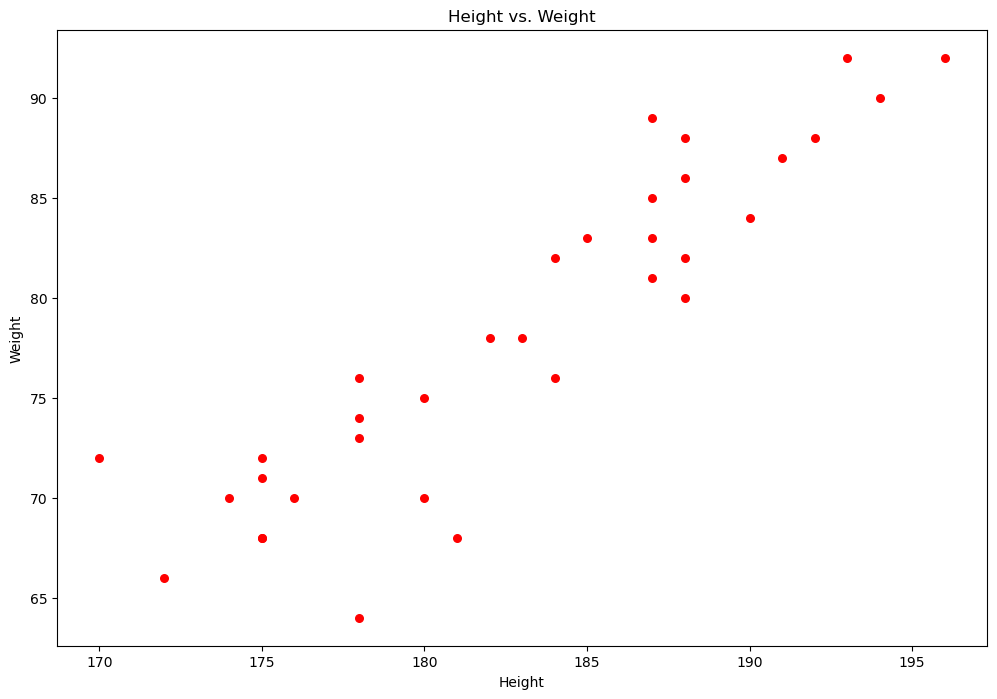

In [60]:
df.plot(kind = "scatter", x = "Height", y = "Weight", figsize = (12, 8), color = "red",
                        title = "Height vs. Weight", s=30)


<Axes: title={'center': 'Age vs. Weight'}, xlabel='Age', ylabel='Weight'>

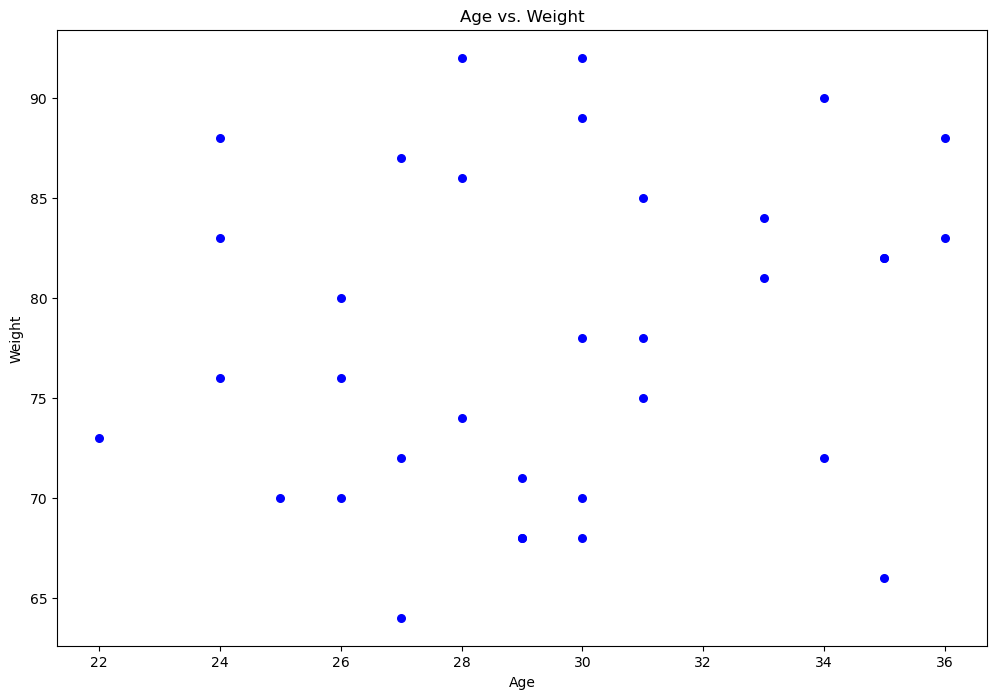

In [61]:
df.plot(kind = "scatter", x = "Age", y = "Weight", figsize = (12, 8), color = "blue",
                        title = "Age vs. Weight", s=30)

<Axes: title={'center': 'Pass Accuracy vs. Assists'}, xlabel='Pass Accuracy', ylabel='Assists'>

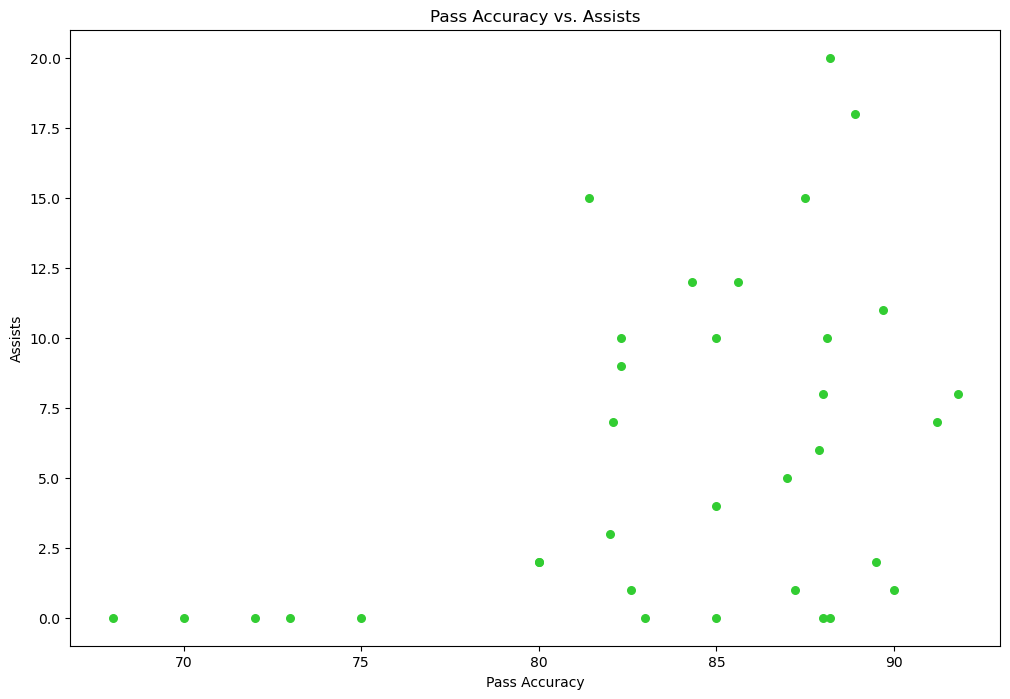

In [62]:
df.plot(kind = "scatter", x = "Pass Accuracy", y = "Assists", figsize = (12, 8), color = "limegreen",
                        title = "Pass Accuracy vs. Assists", s=30)

## Grouping 

Next we group the numerical features related to the players with position, calculate some statistics of the groups and illustrate them with bar charts. Other kind of possibilities for grouping does not exist since the only categorical feature in addition to position is player's name. We would just end up with listing the statistics of individual players which can already be seen from the dataframe.

Average value of Goals for different positions: 

Position
Defender       1.8
Forward       20.6
Goalkeeper     0.0
Midfielder     5.8
Name: Goals, dtype: float64


Text(0.5, 1.0, 'Distribution of goal average by position')

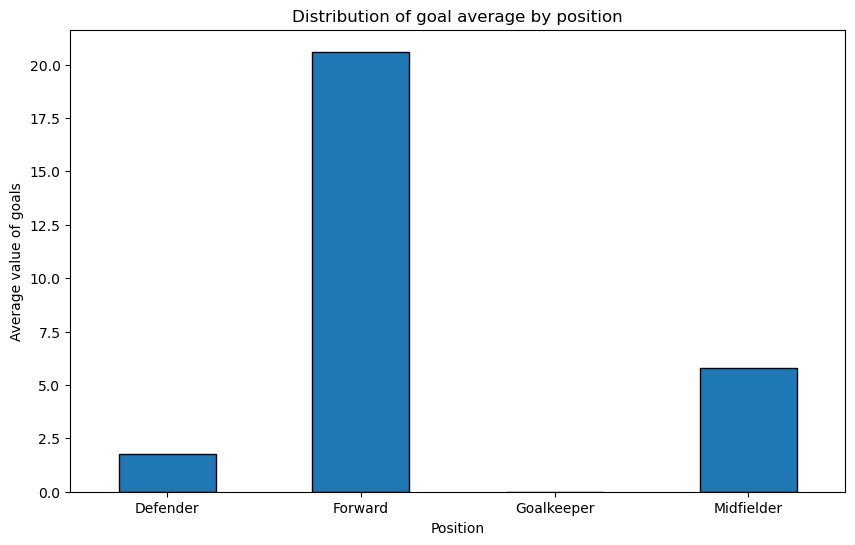

In [63]:
goals = df.groupby("Position")["Goals"].mean()
print("Average value of Goals for different positions: \n")
print(round(goals, 1))

ax2 = goals.plot(kind='bar', y='Goals',  figsize = (10, 6), edgecolor = "black")
plt.ylabel("Average value of goals")
ax2.tick_params(axis='x', rotation=0)
plt.title("Distribution of goal average by position")

Average value of Assists for different positions: 

Position
Defender       1.4
Forward       10.2
Goalkeeper     0.2
Midfielder     9.2
Name: Assists, dtype: float64


Text(0.5, 1.0, 'Distribution of assist average by position')

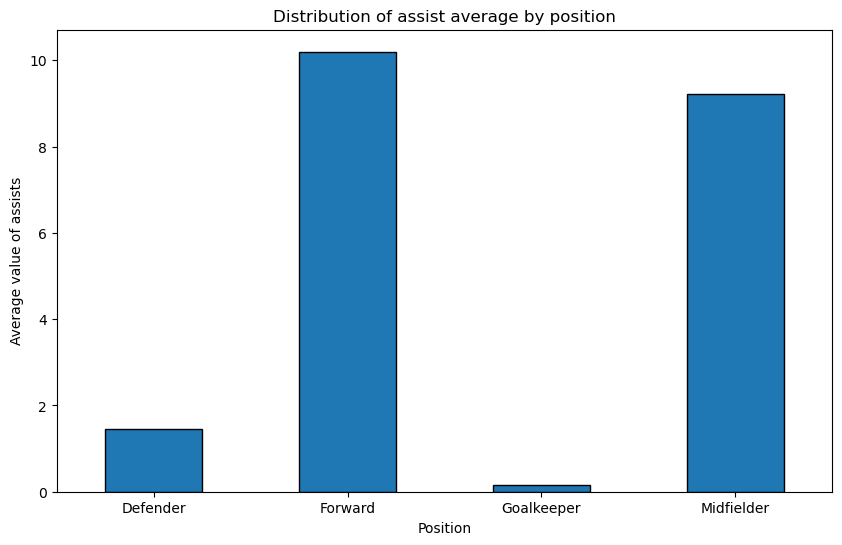

In [64]:
assists = df.groupby("Position")["Assists"].mean()
print("Average value of Assists for different positions: \n")
print(round(assists, 1))

ax3 = assists.plot(kind='bar', y='Assists',  figsize = (10, 6), edgecolor = "black")
plt.ylabel("Average value of assists")
ax3.tick_params(axis='x', rotation=0)
plt.title("Distribution of assist average by position")

Average value of Pass Accuracy for different positions: 

Position
Defender      86.8
Forward       83.4
Goalkeeper    73.4
Midfielder    88.2
Name: Pass Accuracy, dtype: float64


Text(0.5, 1.0, 'Distribution of pass accuracy average by position')

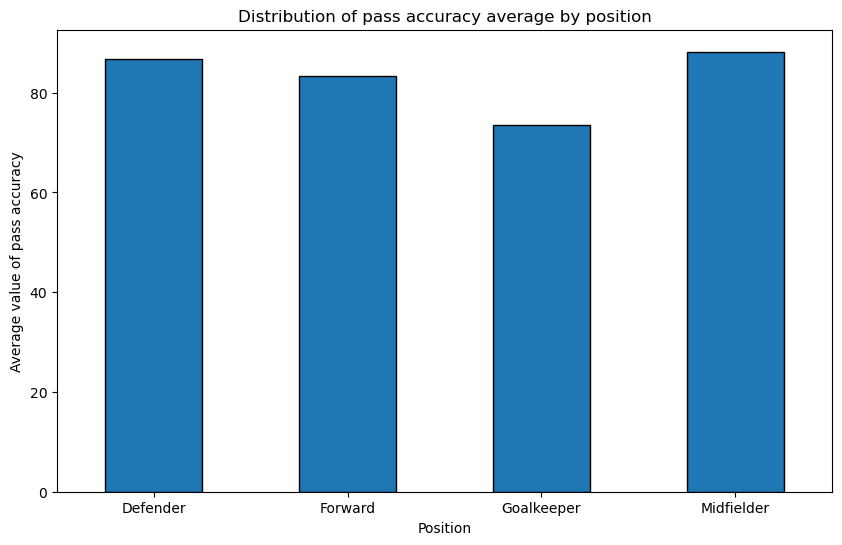

In [65]:
pass_accuracy = df.groupby("Position")["Pass Accuracy"].mean()
print("Average value of Pass Accuracy for different positions: \n")
print(round(pass_accuracy, 1))

ax4 = pass_accuracy.plot(kind='bar', y='Pass Accuracy',  figsize = (10, 6), edgecolor = "black")
plt.ylabel("Average value of pass accuracy")
ax4.tick_params(axis='x', rotation=0)
plt.title("Distribution of pass accuracy average by position")

Average value of Shots on Target for different positions: 

Position
Defender       5.2
Forward       44.2
Goalkeeper     0.0
Midfielder    18.9
Name: Shots on Target, dtype: float64


Text(0.5, 1.0, 'Distribution of shots on target average by position')

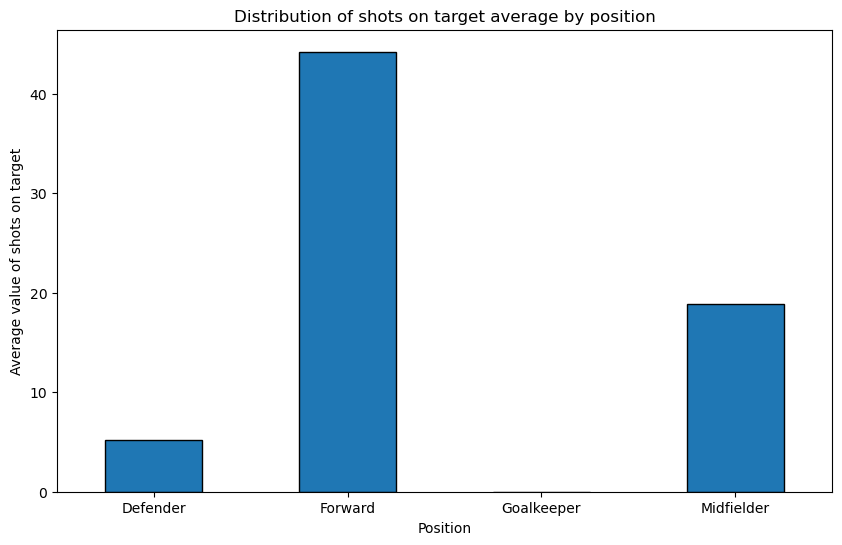

In [66]:
shots_on_target = df.groupby("Position")["Shots on Target"].mean()
print("Average value of Shots on Target for different positions: \n")
print(round(shots_on_target, 1))

ax5 = shots_on_target.plot(kind='bar', y='Shots on Target',  figsize = (10, 6), edgecolor = "black")
plt.ylabel("Average value of shots on target")
ax5.tick_params(axis='x', rotation=0)
plt.title("Distribution of shots on target average by position")

Average value of Tackles for different positions: 

Position
Defender      24.4
Forward       14.3
Goalkeeper     0.3
Midfielder    22.2
Name: Tackles, dtype: float64


Text(0.5, 1.0, 'Distribution of tackle average by position')

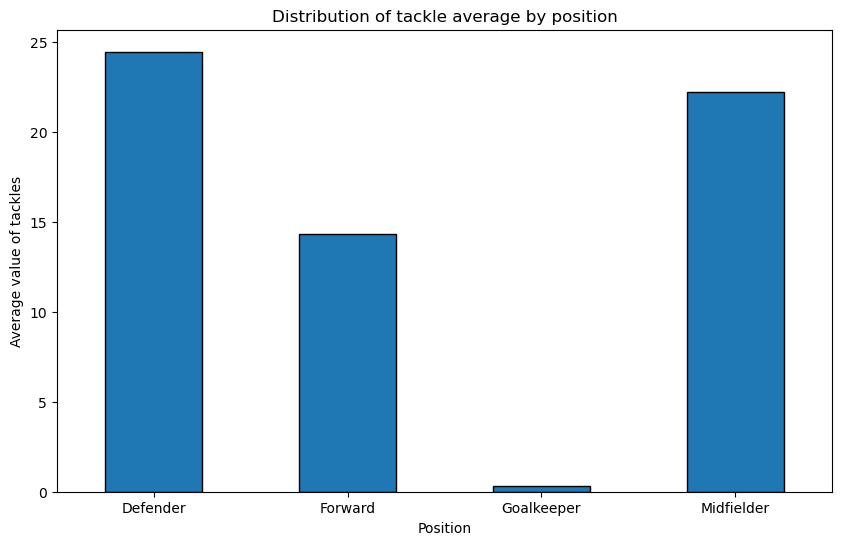

In [67]:
tackles = df.groupby("Position")["Tackles"].mean()
print("Average value of Tackles for different positions: \n")
print(round(tackles, 1))

ax6 = tackles.plot(kind='bar', y='Tackles',  figsize = (10, 6), edgecolor = "black")
plt.ylabel("Average value of tackles")
ax6.tick_params(axis='x', rotation=0)
plt.title("Distribution of tackle average by position")

Average value of Interceptions for different positions: 

Position
Defender      18.0
Forward        7.1
Goalkeeper     0.2
Midfielder    15.6
Name: Interceptions, dtype: float64


Text(0.5, 1.0, 'Distribution of interception average by position')

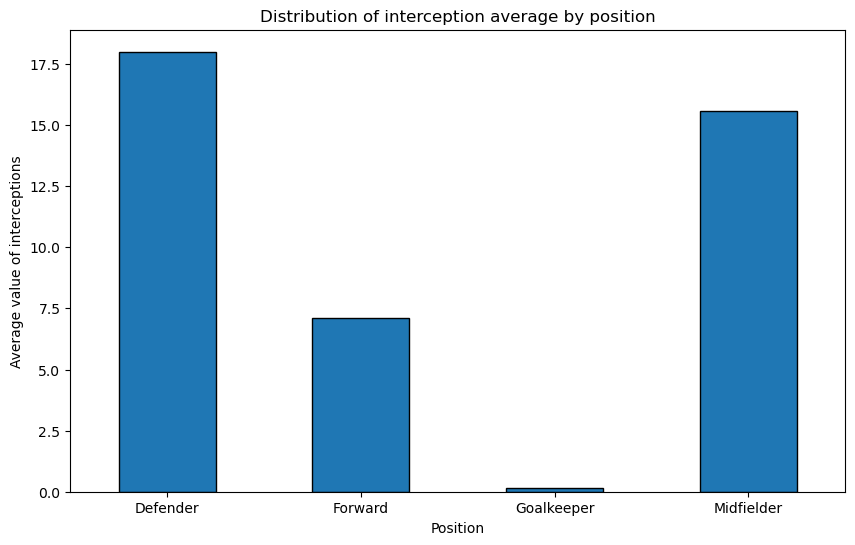

In [68]:
interceptions = df.groupby("Position")["Interceptions"].mean()
print("Average value of Interceptions for different positions: \n")
print(round(interceptions, 1))

ax7 = interceptions.plot(kind='bar', y='Interceptions',  figsize = (10, 6), edgecolor = "black")
plt.ylabel("Average value of interceptions")
ax7.tick_params(axis='x', rotation=0)
plt.title("Distribution of interception average by position")

## Correlations

Next we compute the Pearson correlation matrix and the $R^2$ matrix from which we can see the possible linear dependencies between the numerical features. First we have to drop the categorical features Player Name and Position so that the correlation matrix can be calculated.

One possibility to include the feature Position into the analysis would be to use some kind of encoding of the categories. This would however make the interpretation of the results of the linear model more difficult and therefore we drop the position from our analysis.


In [69]:
df2 = df.drop(["Player Name", "Position"], axis = 1)

# Another possibility would be to include the categorical feature Position by get_dummies encoding
# However, encoding of categorical features would bring difficulties into the interpretation of the linear coefficients of the linear model

# dummies = pd.get_dummies(df2["Position"], prefix="Position")
# df2 = pd.concat([df2, dummies], axis=1)
# df2.drop("Position", axis=1, inplace=True)

pearson = df2.corr(method = "pearson")
pearson

,Age,Height,Weight,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
Age,1.000000,0.089911,0.183137,0.057550,-0.010216,0.031624,0.085923,0.084743,0.044904
Height,0.089911,1.000000,0.908091,-0.477764,-0.733838,-0.411273,-0.528406,-0.387628,-0.325613
Weight,0.183137,0.908091,1.000000,-0.411343,-0.760583,-0.447338,-0.502296,-0.424274,-0.352836
Goals,0.057550,-0.477764,-0.411343,1.000000,0.732707,0.165153,0.973598,0.122584,-0.090901
Assists,-0.010216,-0.733838,-0.760583,0.732707,1.000000,0.423228,0.811057,0.346913,0.189027
Pass Accuracy,0.031624,-0.411273,-0.447338,0.165153,0.423228,1.000000,0.245852,0.786069,0.747917
Shots on Target,0.085923,-0.528406,-0.502296,0.973598,0.811057,0.245852,1.000000,0.170410,-0.047183
Tackles,0.084743,-0.387628,-0.424274,0.122584,0.346913,0.786069,0.170410,1.000000,0.917902
Interceptions,0.044904,-0.325613,-0.352836,-0.090901,0.189027,0.747917,-0.047183,0.917902,1.000000


In [70]:
r_squared = pearson **2
r_squared

,Age,Height,Weight,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
Age,1.000000,0.008084,0.033539,0.003312,0.000104,0.001000,0.007383,0.007181,0.002016
Height,0.008084,1.000000,0.824629,0.228258,0.538518,0.169145,0.279213,0.150256,0.106024
Weight,0.033539,0.824629,1.000000,0.169203,0.578487,0.200111,0.252301,0.180009,0.124493
Goals,0.003312,0.228258,0.169203,1.000000,0.536859,0.027276,0.947892,0.015027,0.008263
Assists,0.000104,0.538518,0.578487,0.536859,1.000000,0.179122,0.657814,0.120349,0.035731
Pass Accuracy,0.001000,0.169145,0.200111,0.027276,0.179122,1.000000,0.060443,0.617904,0.559380
Shots on Target,0.007383,0.279213,0.252301,0.947892,0.657814,0.060443,1.000000,0.029039,0.002226
Tackles,0.007181,0.150256,0.180009,0.015027,0.120349,0.617904,0.029039,1.000000,0.842545
Interceptions,0.002016,0.106024,0.124493,0.008263,0.035731,0.559380,0.002226,0.842545,1.000000


Let's draw the correlation matrix and the $R^2$ matrix as a heatmap so that the correlations (positive and negative) can be visualized better.


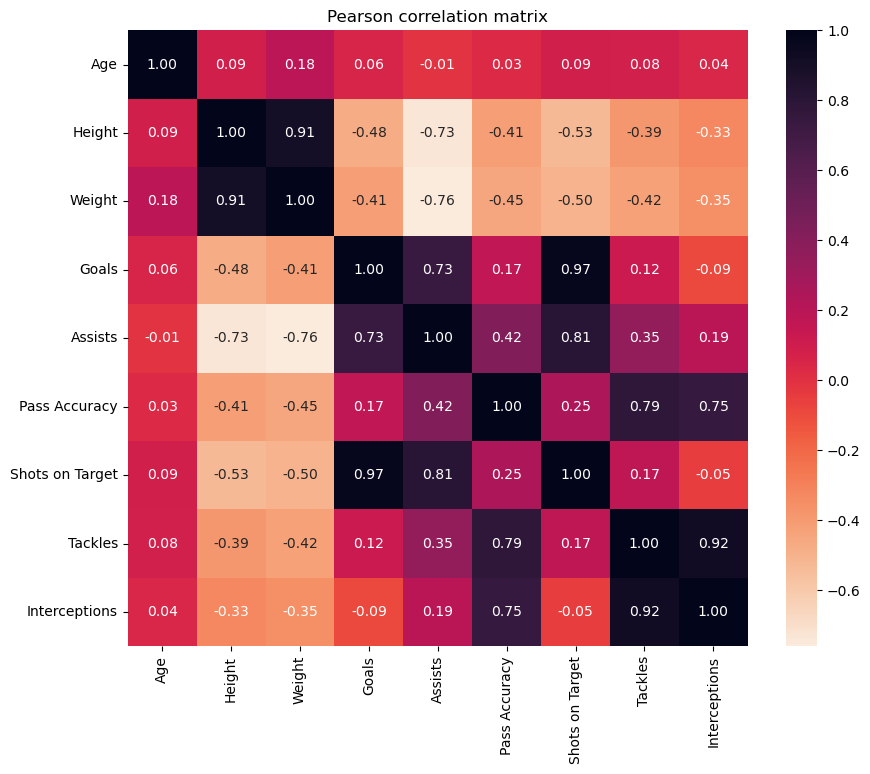

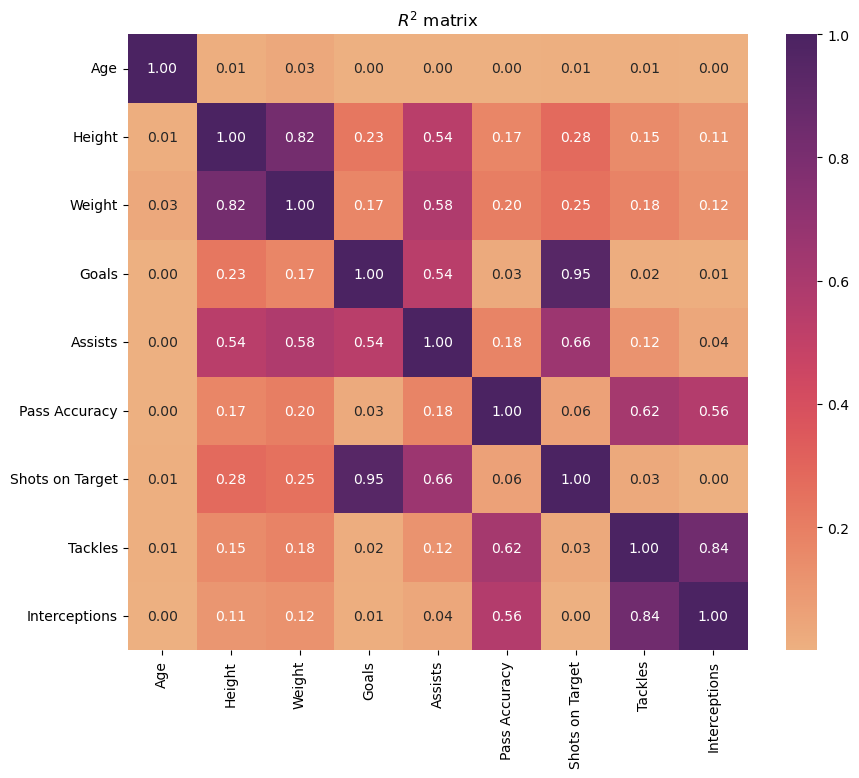

In [71]:
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(pearson,  cmap = "rocket_r", annot = True, fmt = ".2f")
plt.title("Pearson correlation matrix")
plt.show()
plt.figure(figsize = (10,8))
sns.heatmap(r_squared,  cmap = "flare", annot = True, fmt = ".2f")
plt.title("$R^2$ matrix")
plt.show()

Earlier it was seen from the scatter plots that height and weight are strongly correlated. From the correlation matrices above, it can be seen that age does not correlate almost at all with variables other than weight, and even that very weakly. Age therefore does not tell about a player's skills or statistics.

Next, let's draw scatter plots for other strongly correlated variables. It can be seen that shots on goal are positively correlated with the number of goals. Shots on goal are also positively correlated with assists. In addition, tackles and possession of the ball are positively correlated. These three correlations are easy to understand from the point of view of the soccer game. Somewhat surprisingly, we also see that weight and assists are quite strongly and negatively correlated with each other. One may still understand the negativity, but the strength of the correlation comes as a surprise. Of course, once again one has to remember that the amount of data is very small and far reaching conclusions should not be made.


<Axes: title={'center': 'Shots on Target vs. Goals'}, xlabel='Shots on Target', ylabel='Goals'>

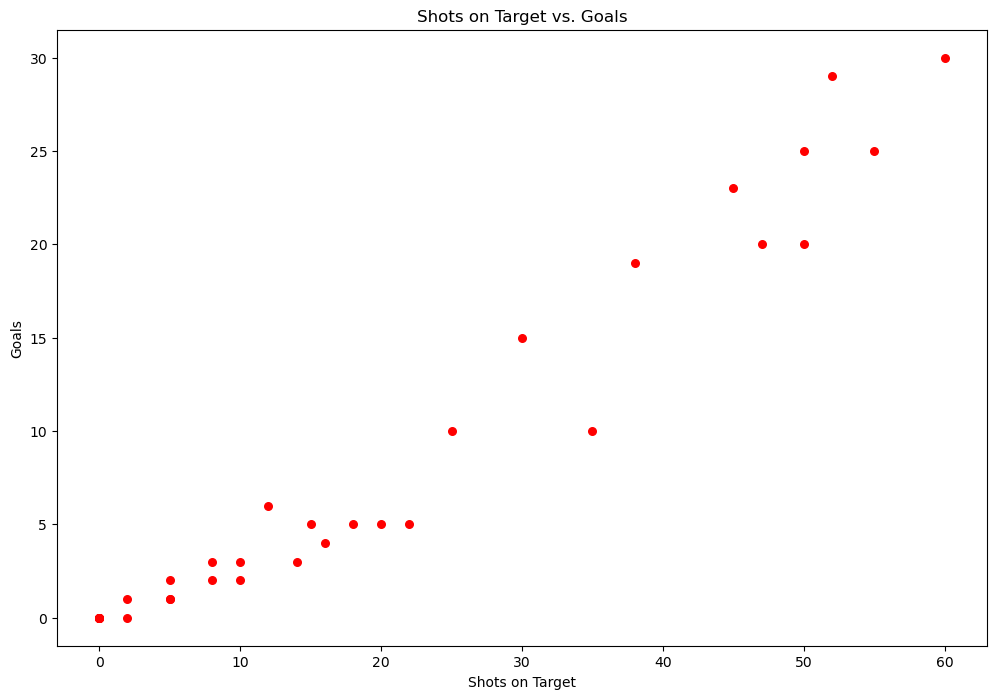

In [72]:
df2.plot(kind = "scatter", x = "Shots on Target", y = "Goals", figsize = (12, 8), color = "red",
                        title = "Shots on Target vs. Goals", s=30)


<Axes: title={'center': 'Shots on Target vs. Assists'}, xlabel='Shots on Target', ylabel='Assists'>

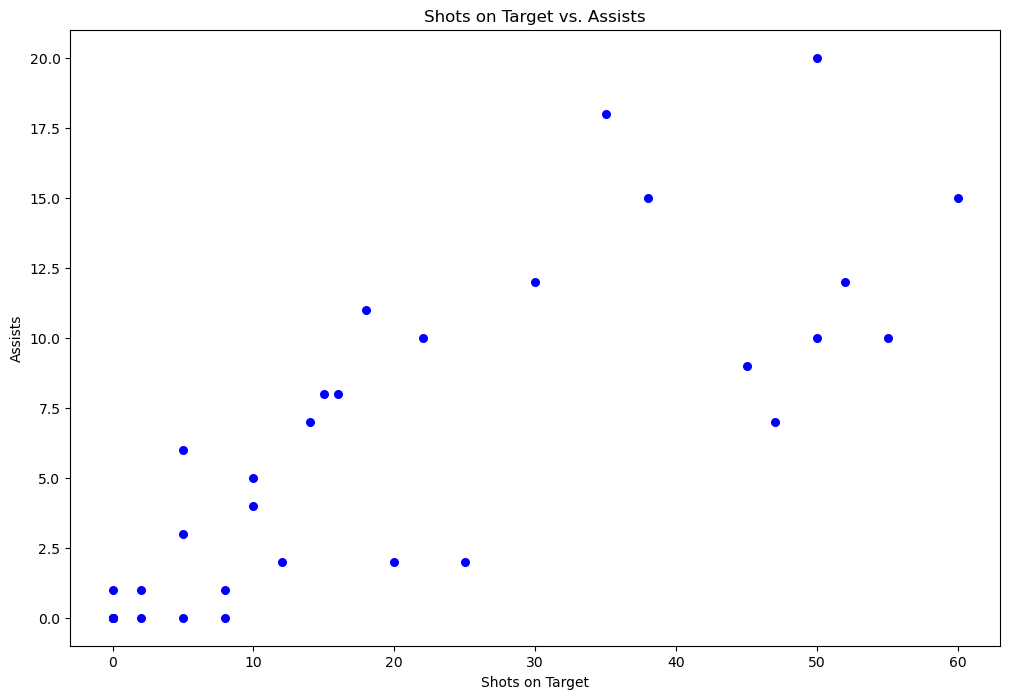

In [73]:
df2.plot(kind = "scatter", x = "Shots on Target", y = "Assists", figsize = (12, 8), color = "blue",
                        title = "Shots on Target vs. Assists", s=30)


<Axes: title={'center': 'Tackles vs. Interceptions'}, xlabel='Tackles', ylabel='Interceptions'>

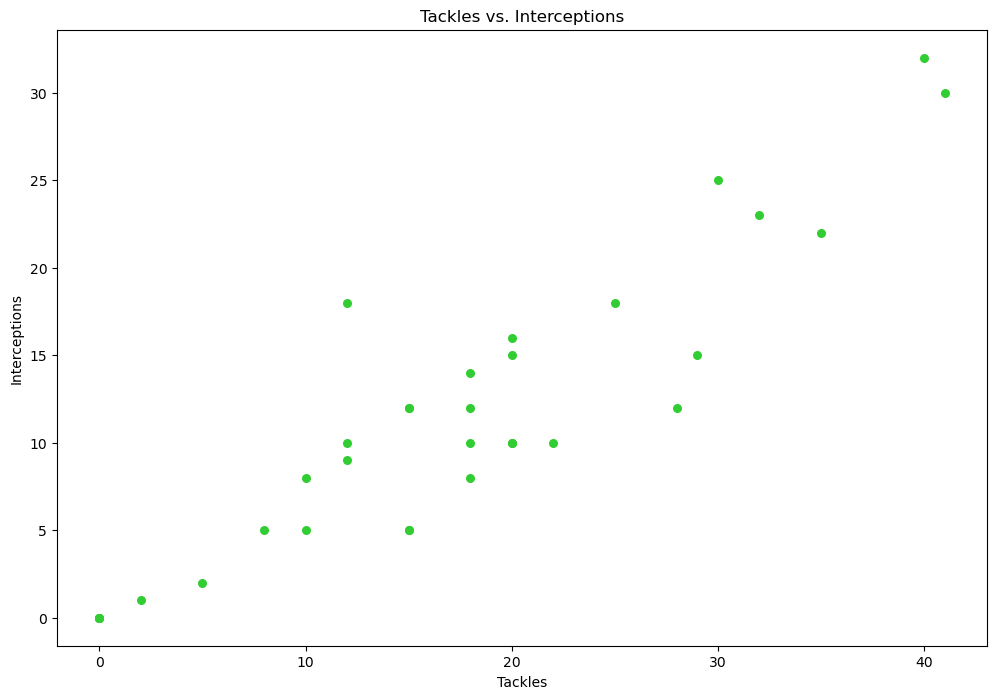

In [74]:
df2.plot(kind = "scatter", x = "Tackles", y = "Interceptions", figsize = (12, 8), color = "limegreen",
                        title = "Tackles vs. Interceptions", s=30)

<Axes: title={'center': 'Weight vs. Assists'}, xlabel='Weight', ylabel='Assists'>

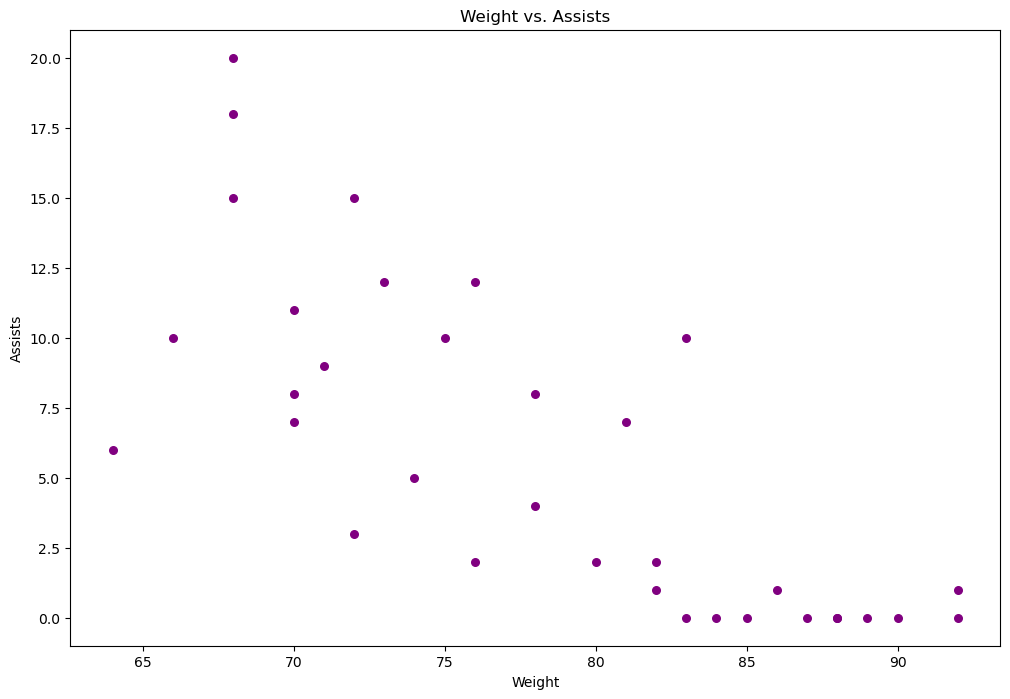

In [75]:
df2.plot(kind = "scatter", x = "Weight", y = "Assists", figsize = (12, 8), color = "purple",
                        title = "Weight vs. Assists", s=30)

In order to find outliers, statistical information about numerical features is needed. A 95% confidence interval is determined using the standard deviation and mean for features resembling a normal distribution. For others, due to the type of distribution, a different rule is used, i.e. the value from which 95% of all values are below is taken (from these distributions, it can be noticed that they are weighted towards small values).


Features that resemble the normal distribution are: age, height, weight and pass accuracy. Tackles and interceptions also partly resemble a normal distribution, but the most common value in these is 0, which means the distribution is weighted towards the beginning.


In [76]:
gaussian_features = df2[["Age", "Height", "Weight", "Pass Accuracy"]]
gaussian = gaussian_features.describe()
gaussian

,Age,Height,Weight,Pass Accuracy
count,34.000000,34.000000,34.000000,34.000000
mean,29.500000,182.911765,78.264706,83.817647
std,3.807887,6.859489,8.147537,6.089856
min,22.000000,170.000000,64.000000,68.000000
25%,27.000000,178.000000,71.250000,82.025000
50%,29.500000,183.500000,78.000000,85.000000
75%,32.500000,188.000000,84.750000,88.075000
max,36.000000,196.000000,92.000000,91.800000


In [77]:
percentiles_95 = []
columns = gaussian.columns
for column in gaussian.columns:
    percentiles_95.append([gaussian.loc["mean",column]-2*gaussian.loc["std",column], 
                          gaussian.loc["mean",column]+2*gaussian.loc["std",column]])  
print("95 % confidence intervals for gaussian looking features: \n")
for i in range(len(columns)):
    print(f"{columns[i]}: {percentiles_95[i]}")

95 % confidence intervals for gaussian looking features: 

Age: [21.88422689413609, 37.11577310586391]
Height: [169.19278738682073, 196.63074202494397]
Weight: [61.96963264641117, 94.55977911829471]
Pass Accuracy: [71.63793510639186, 95.99735901125521]


From the previous one, we can see that there are outliers in the Gaussian case only in Pass Accuracy, so let's remove them. For the rest of the features, the value is truncated towards the point where 95% of all values are obtained.

We see that after removing the outliers the size of the dataset is reduced by 9 rows (which is roughly 26% of the whole dataset).


In [78]:
print(f"Number of rows before removing outliers: {len(df2)}")

df2 = df2[(df2["Pass Accuracy"] >= percentiles_95[3][0]) & (df2["Pass Accuracy"] <= percentiles_95[3][1])]

df2 = df2[df2["Goals"]<= df["Goals"].quantile(0.95)]
df2 = df2[df2["Assists"]<= df["Assists"].quantile(0.95)]
df2 = df2[df2["Shots on Target"]<= df["Shots on Target"].quantile(0.95)]
df2 = df2[df2["Tackles"]<= df["Tackles"].quantile(0.95)]
df2 = df2[df2["Interceptions"]<= df["Interceptions"].quantile(0.95)]

df2.reset_index(drop = True, inplace = True)

print(f"Number of rows after removing outliers: {len(df2)}")
df2

Number of rows before removing outliers: 34
Number of rows after removing outliers: 25


,Age,Height,Weight,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
0,29,175,71,23,9,82.3,45,18,8
1,35,172,66,5,10,88.1,22,30,25
2,29,175,68,19,15,81.4,38,12,9
3,30,174,70,3,7,91.2,14,25,18
4,28,188,86,0,1,82.6,0,2,1
5,30,187,89,1,0,88.2,2,29,15
6,31,183,78,4,8,91.8,16,18,14
7,30,193,92,3,1,87.2,8,35,22
8,33,187,81,20,7,82.1,47,10,5
9,26,178,76,15,12,84.3,30,20,16


## Modeling 

In the modeling phase there are basically two options: classification or regression. In the classification task, the only classification would be based on the position, since it is the only categorical feature besides the name. We will try to apply a linear regression model where the target variable is the number of goals and the input variables are other numerical features. In other words, we try to predict a player's goal score based on the player's other numerical statistics and personal characteristics. The reader can implement the classification task on his/her own if that sounds interesting (or wants to practice other machine learning methods than linear regression).  

Note that the amount of data is now questionably small for any machine learning algorithm to make reliable predictions. The training data would shrink even more when it would be necessary to divide the data into training and test data. In this case, the training would remain imprecise and the test set would be too small to properly evaluate the reliability of the machine learning model.

However, it can be seen from the correlation matrices and scatter plots that there is a strong linear dependence between the number of goals and some other numerical features, which justifies the use of linear regression. Although not all correlations are strong, all other numerical features are used as input variables to make the linear model as accurate as possible.

In linear regression it is questionable to include the position by encoding because then the categorical variable (position) would be mixed with other "almost continuous" numerical variables (some of which, such as the number of goals and assists, are however discrete). The end result of the regression depends on how the categorical variable is encoded, i.e. what numerical value is given to the different positions, and there is no general good rule for doing this.

High-dimensional linear regression, i.e. hyperlevel fitting, cannot be illustrated by plotting. However, a scatter plot of the predicted number of goals and their deviations from the actual values can be plotted. In this case, one can roughly see how the model performs with different goal scores, i.e. how the linear model fits the data.


Mean absolute error:  0.958381838717103
Model score (R^2 coefficient of determination):  0.9742838169602349

Coefficients for different features: 

Age: -0.09065447335156997
Height: -0.2984956517197225
Weight: 0.43798136112536723
Assists: 0.24065396707158013
Pass Accuracy: 0.008376258461394528
Shots on Target: 0.4875768673452294
Tackles: 0.01935790264832807
Interceptions: -0.13693050537235035


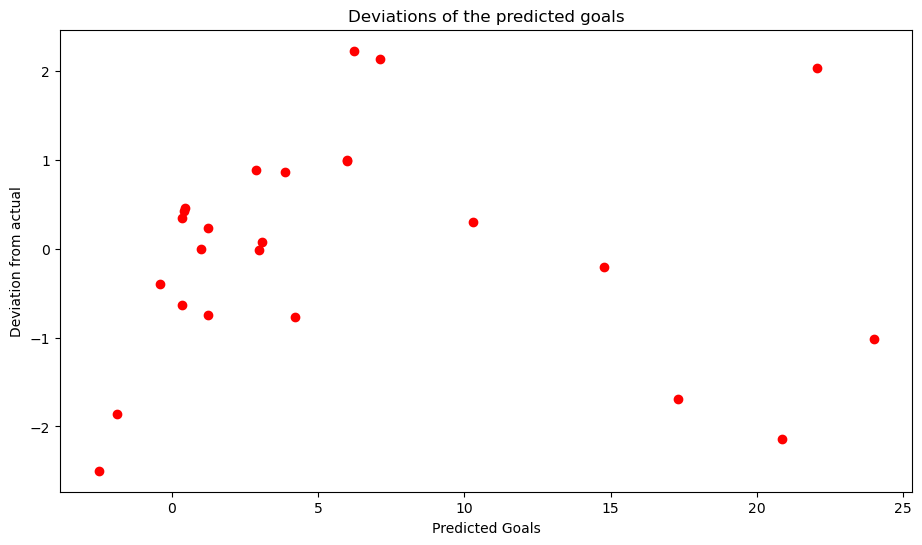

,Age,Height,Weight,Goals,Predicted Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
0,29,175,71,23,20.854706,9,82.3,45,18,8
1,35,172,66,5,5.995804,10,88.1,22,30,25
2,29,175,68,19,17.311032,15,81.4,38,12,9
3,30,174,70,3,3.869124,7,91.2,14,25,18
4,28,188,86,0,0.419747,1,82.6,0,2,1
5,30,187,89,1,1.237921,0,88.2,2,29,15
6,31,183,78,4,6.228910,8,91.8,16,18,14
7,30,193,92,3,3.076264,1,87.2,8,35,22
8,33,187,81,20,22.038053,7,82.1,47,10,5
9,26,178,76,15,14.789423,12,84.3,30,20,16


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()

x = df2.drop(columns = ["Goals"], axis = 1)
y = df2["Goals"]

model.fit(x, y)

# Let's put the predicted goals next to the actual goals in the data frame so that we can compare them straight in the dataframe
df2.insert(loc = 4, column = "Predicted Goals", value = model.predict(x)) 

mae = mean_absolute_error(y, df2["Predicted Goals"])
print("Mean absolute error: ", mae)

print("Model score (R^2 coefficient of determination): ", model.score(x, y)) 

coefficients = model.coef_
print()
print("Coefficients for different features: \n")
for i in range(len(x.columns)):
    print(f"{x.columns[i]}: {coefficients[i]}")


plt.figure(figsize=(11, 6))
plt.scatter(df2["Predicted Goals"], df2["Predicted Goals"] - y, color = "red")
plt.xlabel('Predicted Goals')
plt.ylabel('Deviation from actual')
plt.title("Deviations of the predicted goals")
plt.show()
df2

## Analysis of the results 

The linear model performs the regression reasonably well. The mean absolute error of the model is surprisingly good at approx. 0.96 and the $R^2$-score is also excellent at approx. 0.97, which means that approx. 97% of the variation in the number of goals is explained by the selected input features. The linear model thus predicts the number of goals well, although the amount of data in this case is very small and therefore it is not worth drawing far-reaching conclusions. It can be seen that the model predicts goals well, especially for small numbers of goals. This is certainly due to the fact that the goal distribution is heavily weighted towards small values, in which case there is not enough data for large numbers of goals in the regression to make the forecast reliable for high-scoring players. However, the model also makes "absurd" predictions when it predicts that the number of goals will be negative for some players (would these be counted as own goals?) and as a result of the regression, the number of goals is not necessarily a whole number (it should probably be rounded down to the nearest whole number).

The coefficients of the linear model show how big and in what direction the dependence of different features is with the number of goals. Note that the magnitudes of the coefficients differ from pairwise correlations with the number of goals (see correlation matrix), because now all numerical features are included in linear modeling and the values in the correlation matrix are between -1 and 1. In particular, the following linear dependencies are now seen:

- Height has a negative effect (coefficient = -0.3) on the number of goals. This is both understandable and surprising. Tall players can be more clumsy than shorter ones, but they have an advantage in butts, e.g. corner kicks.
- Weight has a positive effect (coefficient = 0.44) on the number of goals. This is both understandable and surprising. Heavier players may be slower and clumsier, but they do have an advantage in combat situations.
- Assists have a positive effect (coefficient = 0.24) on the number of goals. This is understandable, as players who often score goals and shoot towards the goal also get assists.
- Shots on goal have a positive effect (coefficient = 0.49) on the number of goals, which is logical, because you can't get goals if you don't shoot on goal. In addition, there are very few shots on goal in soccer games and most of the time a goal is scored from a good position.
- Interceptions has a negative effect (coefficient = -0.14) on the number of goals. This is quite understandable, as defensive players may be more skilled than attacking players when it comes to taking possession of the ball, and attacking players may be more reluctant to engage in active defensive play.

Other numerical features (age, pass accuracy and tackles) do not significantly affect the number of goals according to this linear model (which includes all numerical features). The coefficients of the linear model should probably not be interpreted too seriously based on such small data and especially because, as the name suggests, the model assumes a linear dependence between the number of goals and all other numerical features.

It is clear that the position has a great influence on the number of goals (e.g. goalkeeper vs. forward). However, it is difficult to take the position into account in the regression because it is not a numerical quantity. The position should therefore be converted to a number, which is not unambiguous. What weight would you give, for example, to a goalkeeper or a defender? The usual label encoding (that is, changing to a list [0, 1, 2, 3]) does not make sense in regression, because the final result depends on the numeric values given to the categorical variable. Could the playing position have been replaced with, for example, a goal average corresponding to the playing position? However, In this project I did not include the position in the analysis because categorical variables are problematic in regression (this could be investigated in future projects).
